In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
iris = pd.read_csv('Iris.csv')

In [3]:
iris.head()#get the gist of the data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


We don't need to do feature scaling and there is no missing value.This is a classification problem. 

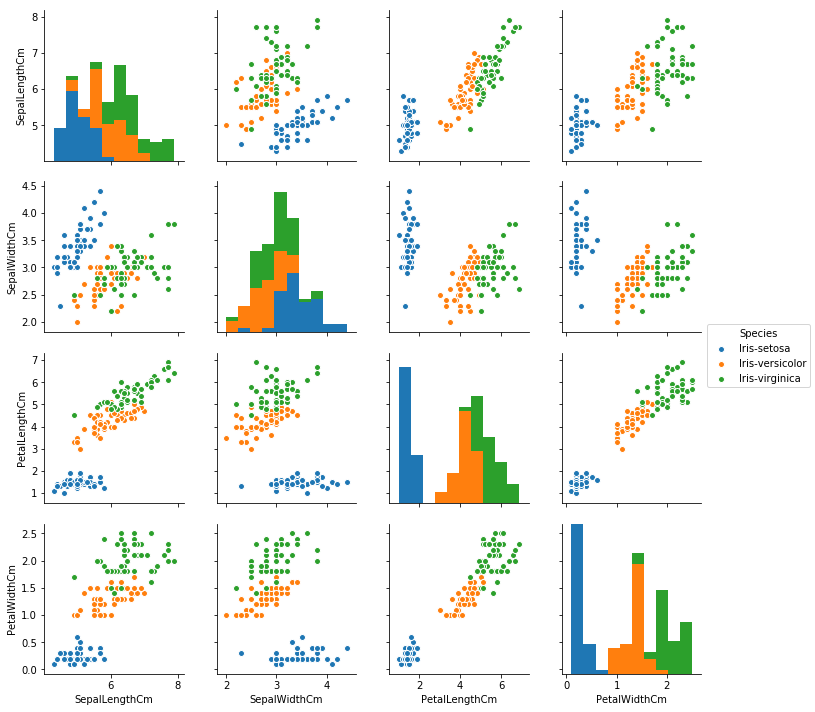

In [5]:
sns.pairplot(iris.drop('Id',axis=1),hue='Species')

LOGISTIC REGRESSION

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(iris.drop('Species',axis=1),iris['Species'])

In [7]:
#now we have to chose which ML algorithm to apply so as we can see that we have only 150 enteries of data.
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
y_predict = logistic.predict(X_test)

In [9]:
from sklearn.metrics import classification_report,confusion_matrix


In [10]:
confusion_matrix(y_test,y_predict)

array([[14,  0,  0],
       [ 0, 11,  3],
       [ 0,  1,  9]])

In [11]:
print(classification_report(y_test,y_predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.92      0.79      0.85        14
 Iris-virginica       0.75      0.90      0.82        10

    avg / total       0.90      0.89      0.90        38



In [12]:
logistic.get_params

<bound method LogisticRegression.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)>

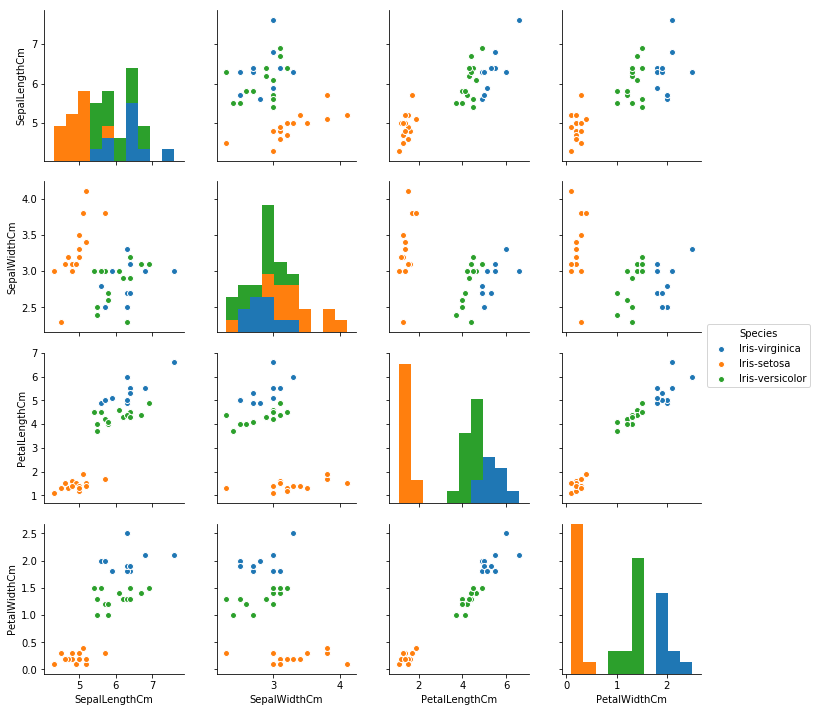

In [13]:
test_data = pd.concat([X_test,y_test],axis=1)
test_data.head()
sns.pairplot(test_data.drop('Id',axis=1),hue='Species')

SVM(SUPPORT VECTOR MACHINE)

In [14]:
from sklearn.svm import SVC
classifier = SVC()

In [15]:
classifier.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
svmy_predict = classifier.predict(X_test)

In [17]:
confusion_matrix(y_test,svmy_predict)

array([[14,  0,  0],
       [ 0, 14,  0],
       [ 0,  0, 10]])

In [18]:
print(classification_report(y_test,svmy_predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      1.00      1.00        14
 Iris-virginica       1.00      1.00      1.00        10

    avg / total       1.00      1.00      1.00        38



BY USING RANDOM-FOREST CLASSIFIER


In [20]:
from sklearn.ensemble import RandomForestClassifier
random_classifier = RandomForestClassifier()
random_classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
random_predict = random_classifier.predict(X_test)

In [22]:
print(classification_report(y_test,random_predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      1.00      1.00        14
 Iris-virginica       1.00      1.00      1.00        10

    avg / total       1.00      1.00      1.00        38

